In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
player_playoff_stats = pd.read_excel("data_files/Playoff Player Stats.xlsx")
player_playoff_stats = player_playoff_stats[['Year', 'Age', 'Team', 'Lg', 'Round', 'W/L', 'Opp', 'G', 'W', 'L']]

In [138]:

player_playoff_stats['Year'] = pd.to_numeric(player_playoff_stats['Year'], errors='coerce')
player_playoff_stats


,Year,Age,Team,Lg,Round,W/L,Opp,G,W,L
0,1985.0,21.0,CHI,1985.0,EC1,L (1-3),MIL,4.0,1.0,3.0
1,1986.0,22.0,CHI,1986.0,EC1,L (0-3),BOS,3.0,0.0,3.0
2,1987.0,23.0,CHI,1987.0,EC1,L (0-3),BOS,3.0,0.0,3.0
3,1988.0,24.0,CHI,1988.0,EC1,W (3-2),CLE,5.0,3.0,2.0
4,1988.0,24.0,CHI,1988.0,ECS,L (1-4),DET,5.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...
93,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,2023.0,38.0,LAL,2023.0,WC1,W (4-2),MEM,6.0,4.0,2.0
95,2023.0,38.0,LAL,2023.0,WCS,W (4-2),GSW,6.0,4.0,2.0
96,2023.0,38.0,LAL,2023.0,WCF,L (0-4),DEN,4.0,0.0,4.0


In [139]:
# split 2 df
lebron_df = player_playoff_stats[player_playoff_stats.Year>2003]
jordan_df = player_playoff_stats[player_playoff_stats.Year<=2003]
jordan_df.tail()

,Year,Age,Team,Lg,Round,W/L,Opp,G,W,L
35,1998.0,34.0,CHI,1998.0,ECS,W (4-1),CHH,5.0,4.0,1.0
36,1998.0,34.0,CHI,1998.0,ECF,W (4-3),IND,7.0,4.0,3.0
37,1998.0,34.0,CHI,1998.0,FIN,W (4-2),UTA,6.0,4.0,2.0
38,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2003.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
print(f"Jordan failed to make the playoffs {jordan_df['Round'].isna().sum()} times in his {jordan_df['Year'].nunique()} season career. Lebron failed to make the playoffs {lebron_df['Round'].isna().sum()} times in his {lebron_df['Year'].nunique()} season career. ")

Jordan failed to make the playoffs 2 times in his 15 season career. Lebron failed to make the playoffs 4 times in his 21 season career. 


In [141]:

print(f"Jordan made the finals {(jordan_df['Round'] == 'FIN').sum()} times in his {jordan_df['Year'].nunique()} season career. Lebron made the finals {(lebron_df['Round'] == 'FIN').sum()} times in his {lebron_df['Year'].nunique()} season career.")

Jordan made the finals 6 times in his 15 season career. Lebron made the finals 10 times in his 21 season career.


In [142]:
# Find out each year how far players make it in the playoffs
vc1 = jordan_df.groupby('Year')[['Round']].last().value_counts().rename('Jordan')
vc2 = lebron_df.groupby('Year')[['Round']].last().value_counts().rename('Lebron')
combined_vc = pd.concat([vc1, vc2], axis=1).fillna(0)
combined_vc = combined_vc.reset_index()

In [143]:
combined_vc['Round'].replace({
    'FIN': 'Finals',
    'ECF': 'Conference Finals',
    'WCF': 'Conference Finals',
    'ECS': 'Conference Semi Finals',
    'EC1': 'Conference First Round',
    'WC1': 'Conference First Round',
}, inplace=True)

In [144]:
combined_vc = combined_vc.groupby('Round').sum().reset_index()
combined_vc.loc[len(combined_vc)] = ['Not made the playoffs', '2', '4']

In [145]:
combined_vc[['Jordan', 'Lebron']] = combined_vc[['Jordan', 'Lebron']].astype(int)
combined_vc = combined_vc.reindex([3, 0, 2, 1,4]).reset_index(drop=True)

In [146]:
combined_vc

,Round,Jordan,Lebron
0,Finals,6,10
1,Conference Finals,2,2
2,Conference Semi Finals,2,3
3,Conference First Round,3,2
4,Not made the playoffs,2,4


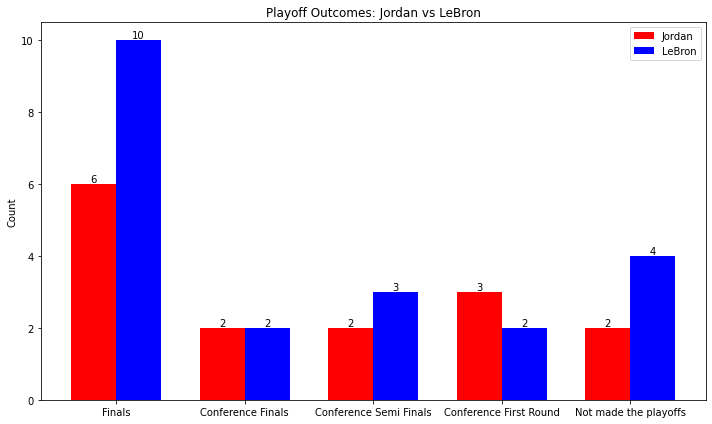

In [147]:
plt.figure(figsize=(10, 6))

x = np.arange(len(combined_vc['Round']))
width = 0.35

plt.bar(x - width/2, combined_vc['Jordan'], width, label='Jordan', color="red")
plt.bar(x + width/2, combined_vc['Lebron'], width, label='LeBron', color="blue")

plt.xticks(x, combined_vc['Round'])
plt.ylabel('Count')
plt.title('Playoff Outcomes: Jordan vs LeBron')
plt.legend()

bars_jordan = plt.bar(x - width/2, combined_vc['Jordan'], width, color='red', label='Jordan')
bars_lebron = plt.bar(x + width/2, combined_vc['Lebron'], width, color='blue', label='LeBron')
for bar in bars_jordan:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom')
for bar in bars_lebron:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [148]:
# Now I am trying to find out all the opponents both players faced in the Finals
player_playoff_stats.loc[player_playoff_stats['Round'] == "FIN"]


,Year,Age,Team,Lg,Round,W/L,Opp,G,W,L
14,1991.0,27.0,CHI,1991.0,FIN,W (4-1),LAL,5.0,4.0,1.0
18,1992.0,28.0,CHI,1992.0,FIN,W (4-2),POR,6.0,4.0,2.0
22,1993.0,29.0,CHI,1993.0,FIN,W (4-2),PHO,6.0,4.0,2.0
29,1996.0,32.0,CHI,1996.0,FIN,W (4-2),SEA,6.0,4.0,2.0
33,1997.0,33.0,CHI,1997.0,FIN,W (4-2),UTA,6.0,4.0,2.0
37,1998.0,34.0,CHI,1998.0,FIN,W (4-2),UTA,6.0,4.0,2.0
47,2007.0,22.0,CLE,2007.0,FIN,L (0-4),SAS,4.0,0.0,4.0
58,2011.0,26.0,MIA,2011.0,FIN,L (2-4),DAL,6.0,2.0,4.0
62,2012.0,27.0,MIA,2012.0,FIN,W (4-1),OKC,5.0,4.0,1.0
66,2013.0,28.0,MIA,2013.0,FIN,W (4-3),SAS,7.0,4.0,3.0


In [149]:
# Extract these teams reg season records.
finals_opp_playoff_stats = pd.read_excel("data_files/Playoff Finals Opponent Stats.xlsx")
finals_opp_playoff_stats = finals_opp_playoff_stats.rename(columns={"Unnamed: 0": "Year"})


In [150]:
# Extract the rows with team records
team_record = finals_opp_playoff_stats[finals_opp_playoff_stats['Year'] >1000]
team_record = team_record[['Year','Player','Age']]
team_record = team_record.rename(columns={'Player':'Finals Opponent', 'Age':'Team Record'})
team_record['W'] = team_record['Team Record'].astype(str).str[:2]
team_record['L'] = team_record['Team Record'].astype(str).str[3:]
team_record.head()


,Year,Finals Opponent,Team Record,W,L
0,1991.0,LAL,58-24,58,24
13,1992.0,POR,57-25,57,25
26,1993.0,PHO,62-20,62,20
39,1996.0,SEA,64-18,64,18
52,1997.0,UTA,64-18,64,18


In [151]:
team_record['Team Record %'] = (team_record['W'].astype(int)/ (team_record['W'].astype(int) + team_record['L'].astype(int))).round(2) *100
team_record["Year"] = team_record["Year"].astype(int).astype(str)
team_record.head()

,Year,Finals Opponent,Team Record,W,L,Team Record %
0,1991,LAL,58-24,58,24,71.0
13,1992,POR,57-25,57,25,70.0
26,1993,PHO,62-20,62,20,76.0
39,1996,SEA,64-18,64,18,78.0
52,1997,UTA,64-18,64,18,78.0


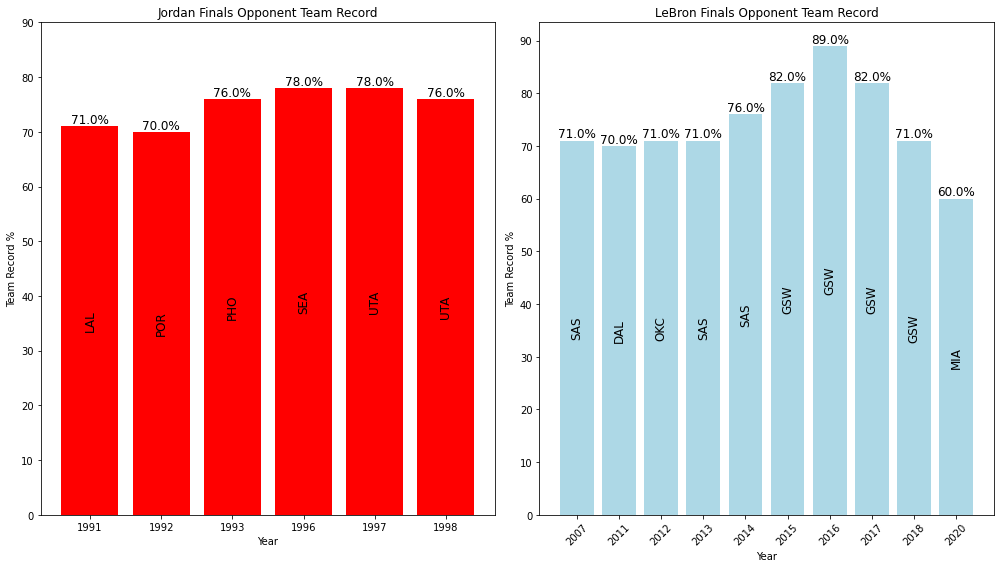

In [152]:
first_6 = team_record.iloc[:6]
last_10 = team_record.iloc[-10:]

# Plotting
plt.figure(figsize=(14, 8))

# First subplot
plt.subplot(1, 2, 1)
bars1 = plt.bar(first_6['Year'], first_6['Team Record %'], color='red')
plt.title('Jordan Finals Opponent Team Record')
plt.xlabel('Year')
plt.ylabel('Team Record %')
plt.xticks()
plt.yticks(np.arange(0, 100, 10))

# Adding labels on top of bars
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=12)

for bar, team in zip(bars1, first_6['Finals Opponent']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{team}', 
             ha='center', va='center', rotation=90, fontsize=12)

# Second subplot
plt.subplot(1, 2, 2)
bars2 = plt.bar(last_10['Year'], last_10['Team Record %'], color='lightblue')
plt.title('LeBron Finals Opponent Team Record')
plt.xlabel('Year')
plt.ylabel('Team Record %')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 100, 10))

# Adding labels on top of bars
for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.1f}%', ha='center', va='bottom', fontsize=12)

for bar, team in zip(bars2, last_10['Finals Opponent']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{team}', 
             ha='center', va='center', rotation=90, fontsize=12)

plt.tight_layout()
plt.show()

In [153]:
# Convert player index based on the year they are playing
finals_opp_playoff_stats['Year'] = finals_opp_playoff_stats['Year'].where(finals_opp_playoff_stats['Year'] >= 1900) 
finals_opp_playoff_stats['Year'].fillna(method='ffill', inplace=True)

In [154]:
# convert year to str (remove decimals)
finals_opp_playoff_stats['Year'] = finals_opp_playoff_stats['Year'].astype(int).astype(str)

In [162]:
# Import league playoff avgs to calculate coefficients
playoff_league_avg = pd.read_excel("data_files/Playoff league average.xlsx")
playoff_league_avg_1 = playoff_league_avg[['Season','PTS','AST', 'TRB', 'STL', 'BLK']].rename(columns={
    'PTS': 'League PTS',
    'AST': 'League AST',
    'TRB': 'League TRB',
    'STL': 'League STL',
    'BLK': 'League BLK'
})
playoff_league_avg_1.head()

,Season,League PTS,League AST,League TRB,League STL,League BLK
0,2024,105.6,23.2,41.8,6.4,4.8
1,2023,109.6,23.7,43.1,6.8,4.8
2,2022,106.3,22.9,42.0,7.1,4.6
3,2021,110.3,22.0,43.4,6.7,4.4
4,2020,109.6,22.9,43.2,7.0,4.3


In [169]:
# Join the players dataframe and league avgs by year
playoff_league_avg_1['Season'] = playoff_league_avg_1['Season'].astype(str)
finals_opp_playoff_stats_joined = pd.merge(finals_opp_playoff_stats, playoff_league_avg_1, left_on='Year', right_on='Season')



In [170]:
finals_opp_playoff_stats_joined

,Year,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,...,TOV,PF,PTS,Awards,Season,League PTS,League AST,League TRB,League STL,League BLK
0,1991,LAL,58-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1991,104.2,23.2,40.8,7.5,4.3
1,1991,Magic Johnson,31.0,PG,19.0,19.0,43.3,6.2,14.1,0.440,...,4.1,2.3,21.8,NaN,1991,104.2,23.2,40.8,7.5,4.3
2,1991,James Worthy,29.0,SF,18.0,18.0,40.7,8.9,19.2,0.465,...,2.2,1.9,21.1,NaN,1991,104.2,23.2,40.8,7.5,4.3
3,1991,Sam Perkins,29.0,PF,19.0,19.0,39.6,6.4,11.6,0.548,...,1.9,3.6,17.7,NaN,1991,104.2,23.2,40.8,7.5,4.3
4,1991,Byron Scott,29.0,SG,18.0,18.0,37.7,5.3,10.3,0.511,...,0.9,2.9,13.2,NaN,1991,104.2,23.2,40.8,7.5,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020,Kelly Olynyk,28.0,C,17.0,0.0,15.2,2.6,5.6,0.474,...,0.8,2.1,7.6,NaN,2020,109.6,22.9,43.2,7.0,4.3
220,2020,Meyers Leonard,27.0,C,3.0,2.0,10.3,1.7,2.7,0.625,...,0.0,1.3,4.7,NaN,2020,109.6,22.9,43.2,7.0,4.3
221,2020,Derrick Jones Jr.,22.0,SF,15.0,0.0,6.5,0.5,1.1,0.471,...,0.1,0.8,1.5,NaN,2020,109.6,22.9,43.2,7.0,4.3
222,2020,Solomon Hill,28.0,PF,7.0,0.0,6.0,0.7,1.3,0.556,...,0.0,0.7,1.7,NaN,2020,109.6,22.9,43.2,7.0,4.3


In [171]:
# Remove rows where 'ColumnName' contains '-' (TEAM Records to be removed)
finals_opp_playoff_stats_joined = finals_opp_playoff_stats_joined[~finals_opp_playoff_stats_joined['Age'].str.contains('-', na=False)]



In [181]:
# Get coeffcients
finals_opp_playoff_stats_joined = finals_opp_playoff_stats_joined.assign(
    PTS_coeff = (finals_opp_playoff_stats_joined['PTS'] / finals_opp_playoff_stats_joined['League PTS']).round(2),
    AST_coeff = (finals_opp_playoff_stats_joined['AST'] / finals_opp_playoff_stats_joined['League AST']).round(2),
    TRB_coeff = (finals_opp_playoff_stats_joined['TRB'] / finals_opp_playoff_stats_joined['League TRB']).round(2),
    STL_coeff = (finals_opp_playoff_stats_joined['STL'] / finals_opp_playoff_stats_joined['League STL']).round(2),
    BLK_coeff = (finals_opp_playoff_stats_joined['BLK'] / finals_opp_playoff_stats_joined['League BLK']).round(2)
)

In [182]:
finals_opp_playoff_stats_joined

,Year,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,...,League PTS,League AST,League TRB,League STL,League BLK,PTS_coeff,AST_coeff,TRB_coeff,STL_coeff,BLK_coeff
1,1991,Magic Johnson,31.0,PG,19.0,19.0,43.3,6.2,14.1,0.440,...,104.2,23.2,40.8,7.5,4.3,0.21,0.54,0.20,0.16,NaN
2,1991,James Worthy,29.0,SF,18.0,18.0,40.7,8.9,19.2,0.465,...,104.2,23.2,40.8,7.5,4.3,0.20,0.17,0.10,0.15,0.02
3,1991,Sam Perkins,29.0,PF,19.0,19.0,39.6,6.4,11.6,0.548,...,104.2,23.2,40.8,7.5,4.3,0.17,0.07,0.20,0.11,0.33
4,1991,Byron Scott,29.0,SG,18.0,18.0,37.7,5.3,10.3,0.511,...,104.2,23.2,40.8,7.5,4.3,0.13,0.07,0.08,0.17,0.05
5,1991,Vlade Divac,22.0,C,19.0,19.0,32.1,5.1,9.1,0.564,...,104.2,23.2,40.8,7.5,4.3,0.13,0.05,0.16,0.19,0.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,2020,Kelly Olynyk,28.0,C,17.0,0.0,15.2,2.6,5.6,0.474,...,109.6,22.9,43.2,7.0,4.3,0.07,0.05,0.11,0.03,0.12
220,2020,Meyers Leonard,27.0,C,3.0,2.0,10.3,1.7,2.7,0.625,...,109.6,22.9,43.2,7.0,4.3,0.04,0.04,0.01,0.04,NaN
221,2020,Derrick Jones Jr.,22.0,SF,15.0,0.0,6.5,0.5,1.1,0.471,...,109.6,22.9,43.2,7.0,4.3,0.01,0.02,0.02,0.06,0.07
222,2020,Solomon Hill,28.0,PF,7.0,0.0,6.0,0.7,1.3,0.556,...,109.6,22.9,43.2,7.0,4.3,0.02,0.02,0.02,0.01,NaN


In [112]:
# split into df for each player
index1 = finals_opp_playoff_stats.index[finals_opp_playoff_stats['Year'] == "2007"].tolist()
finals_jordan_opp = finals_opp_playoff_stats[0:index1[0]]
finals_lebron_opp = finals_opp_playoff_stats[index1[0]:]


In [114]:
finals_jordan_opp

,Year,Player,Age,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1991,LAL,58-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991,Magic Johnson,31.0,PG,19.0,19.0,43.3,6.2,14.1,0.440,...,1.2,6.9,8.1,12.6,1.2,0.0,4.1,2.3,21.8,NaN
2,1991,James Worthy,29.0,SF,18.0,18.0,40.7,8.9,19.2,0.465,...,1.4,2.7,4.1,3.9,1.1,0.1,2.2,1.9,21.1,NaN
3,1991,Sam Perkins,29.0,PF,19.0,19.0,39.6,6.4,11.6,0.548,...,2.2,6.1,8.3,1.7,0.8,1.4,1.9,3.6,17.7,NaN
4,1991,Byron Scott,29.0,SG,18.0,18.0,37.7,5.3,10.3,0.511,...,0.7,2.4,3.2,1.6,1.3,0.2,0.9,2.9,13.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,1998,Greg Foster,29.0,C,20.0,16.0,16.8,2.0,4.3,0.453,...,1.0,2.4,3.4,0.3,0.1,0.3,0.9,2.8,4.1,NaN
74,1998,Antoine Carr,36.0,PF,20.0,0.0,14.6,2.1,4.5,0.456,...,0.8,1.3,2.1,0.6,0.1,0.6,0.5,3.2,4.4,NaN
75,1998,Chris Morris,32.0,SF,17.0,0.0,14.1,1.6,4.1,0.406,...,0.5,2.3,2.8,0.6,0.3,0.2,0.5,2.2,4.5,NaN
76,1998,Adam Keefe,27.0,C,15.0,10.0,10.3,0.7,1.9,0.345,...,0.9,1.4,2.3,0.1,0.3,0.1,0.2,1.2,2.1,NaN
